In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import plotly.graph_objects as go

In [215]:
df=pd.read_csv("Salary_Data.csv")

In [216]:
df.shape

(375, 6)

In [217]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [218]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [219]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education_Level      373 non-null    object 
 3   Job_Title            373 non-null    object 
 4   Years_of_Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years_of_Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [221]:
df.Job_Title.value_counts()

Job_Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

<Axes: ylabel='Education_Level'>

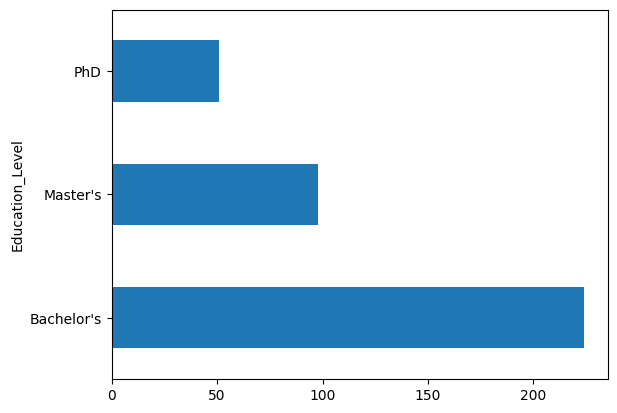

In [222]:
df.Education_Level.value_counts().plot.barh()

In [223]:
df.dtypes

Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object

In [224]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')

In [225]:
df.Job_Title.value_counts()

Job_Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [226]:
print(f"Toplam satır sayısı (duplicate kontrolünden önce): {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Toplam satır sayısı (dublicate kontrolünden sonra): {df.shape[0]}")


Toplam satır sayısı (duplicate kontrolünden önce): 375
Toplam satır sayısı (dublicate kontrolünden sonra): 325


In [227]:
df.isnull().sum()

Age                    1
Gender                 1
Education_Level        1
Job_Title              1
Years_of_Experience    1
Salary                 1
dtype: int64

<Axes: >

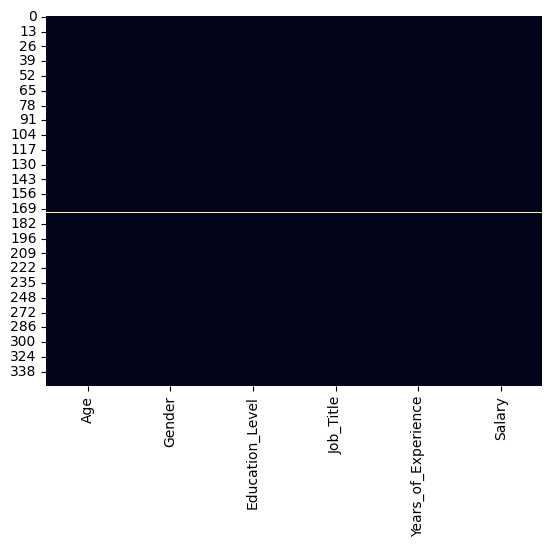

In [228]:
sns.heatmap(df.isnull(),cbar = False)

In [229]:
# Eksik değerler doldurma sadece sayısal özellikler için 
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist() 

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) 

In [230]:
print(df.isnull().sum()) 

Age                    0
Gender                 1
Education_Level        1
Job_Title              1
Years_of_Experience    0
Salary                 0
dtype: int64


<Axes: >

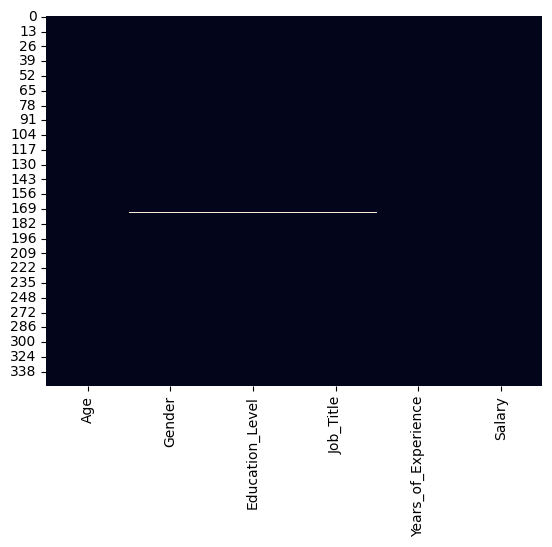

In [231]:
sns.heatmap(df.isnull(),cbar = False)

In [232]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
df['Job_Title'].fillna(df['Job_Title'].mode()[0], inplace=True)

In [233]:
print(df.isnull().sum()) 

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64


In [234]:
# df1 = df.dropna()
# df1.isnull().sum()

In [235]:
# df.shape

In [236]:
df['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [237]:
data = df.copy()  
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education_Level'] = label_encoder.fit_transform(data['Education_Level'])
data['Job_Title'] = label_encoder.fit_transform(data['Job_Title'])

In [238]:
data.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [239]:
correlation = data.corr()
print(correlation['Salary'])

Age                    0.916543
Gender                 0.075315
Education_Level        0.661315
Job_Title              0.135612
Years_of_Experience    0.924455
Salary                 1.000000
Name: Salary, dtype: float64


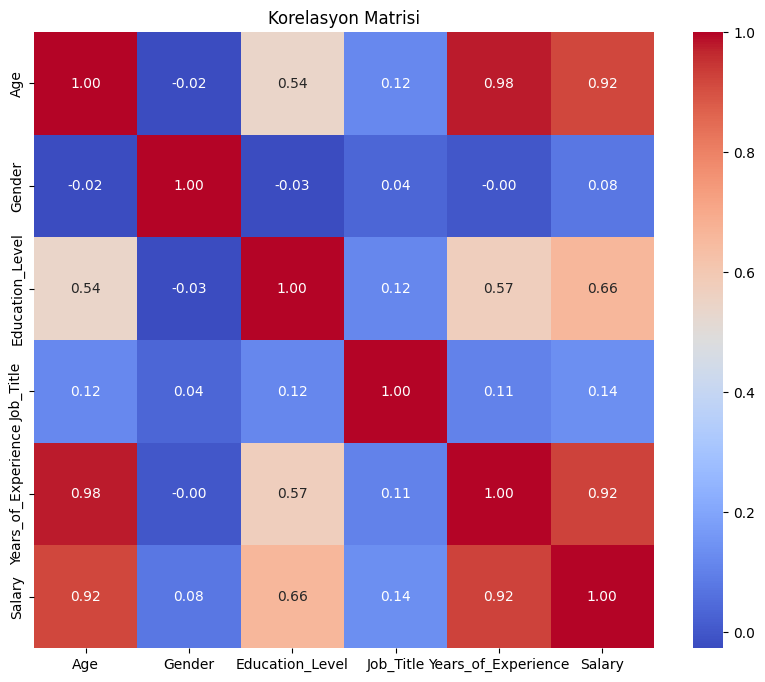

In [240]:
# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

In [241]:
# Korelasyon grafikleri
columns = ['Age', 'Gender', 'Education_Level', 'Job_Title','Years_of_Experience']

for col in columns:
    fig = px.scatter(df, x=col, y='Salary', title=f'Salary vs {col.capitalize()}')
    fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
data= data.drop( ['Gender'], axis=1)
data.head(10)

In [ ]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = data.drop('Salary', axis=1)
y = data['Salary']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest modeli oluşturma
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

In [ ]:
# cross-validation 
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print(f"Mean Squared Error (Cross-Validation): {-np.mean(mse_scores)}")
print(f"R^2 Score (Cross-Validation): {np.mean(r2_scores)}")

In [ ]:
# Cross-validation ile model performansını değerlendirme
start_cv_time = time.time()
end_cv_time = time.time()
cv_time = end_cv_time - start_cv_time

# Sonuçları gösterme
print("Eğitim Süresi:", training_time)
print("Cross-validation Süresi:", cv_time)



In [ ]:
# Modeli eğitme
model.fit(X_train, y_train)

In [ ]:
# Tahminler
y_pred = model.predict(X_test)

In [ ]:
# Performans metriği hesaplama
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# # Confusion matrix ve classification report
# conf_matrix = confusion_matrix(y_test, y_pred, labels=Salary)
# class_report = classification_report(y_test, y_pred, labels=Salary)

# print("Confusion Matrix:")
# print(conf_matrix)

# print("\nClassification Report:")
# print(class_report)

# # Confusion matrix'i görselleştirme
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=Salary, yticklabels=Salary)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# Özellik önem dereceleri
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Özelliklerin sıralanması
features = X.columns
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

# Özellik önem derecelerini görselleştirme
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Hata dağılımı
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Artık grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()